1. Veri seti yüklendi. Toplam örnek sayısı: 1140


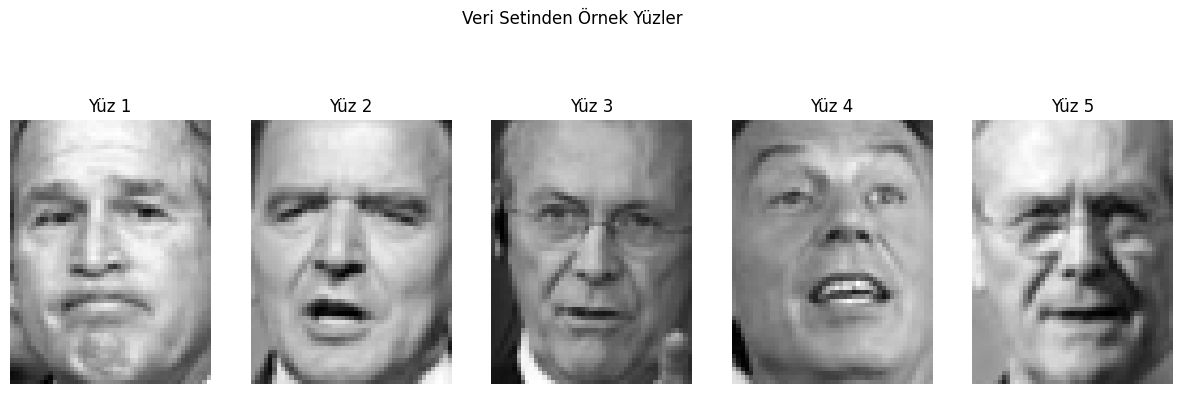

2. HOG özellikleri çıkarılıyor...


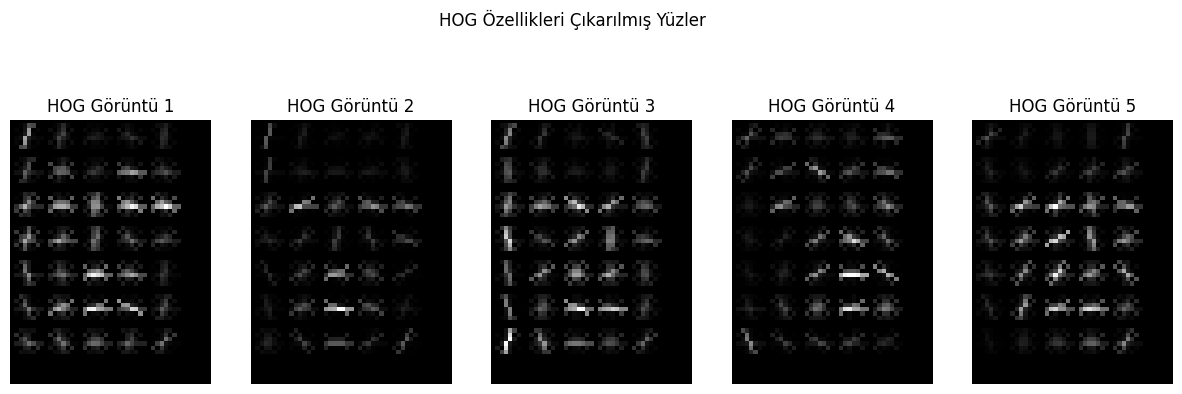

3. HOG özellikleri başarıyla çıkarıldı.
4. Eğitim ve test verisi olarak ayrılıyor...
Eğitim verisi boyutu: 798, Test verisi boyutu: 342
5. SVM modeli oluşturuluyor ve eğitiliyor...
SVM modeli başarıyla eğitildi.
6. Test verisi üzerinde tahmin yapılıyor...
Model Doğruluk Skoru: 0.90
7. Doğru ve yanlış tahmin edilen örnekler görselleştiriliyor...


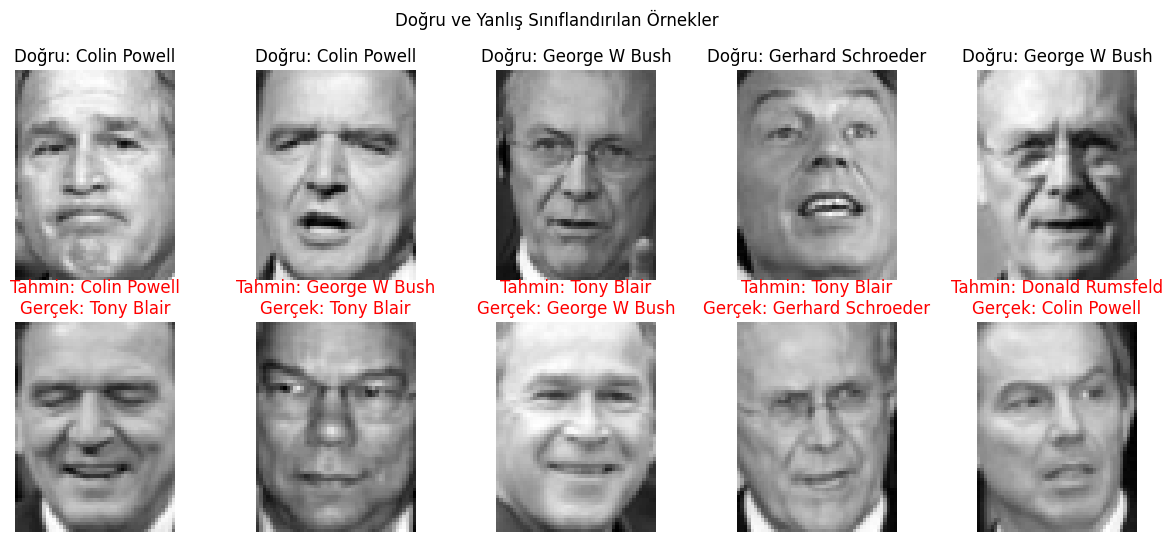

8. Görselleştirme tamamlandı.


In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people

# Veri setini yükle (LFW veri setini yüz tanıma için kullanıyoruz)
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
X = lfw_dataset.images
y = lfw_dataset.target

print("1. Veri seti yüklendi. Toplam örnek sayısı:", len(X))

# İlk birkaç örneği görselleştir
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Yüz {i+1}")
plt.suptitle("Veri Setinden Örnek Yüzler")
plt.show()

# HOG özelliklerini çıkaran bir fonksiyon
def extract_hog_features(images):
    hog_features = []
    hog_images = []
    for image in images:
        # HOG özelliklerini çıkar
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True, channel_axis=None)
        hog_features.append(features)
        hog_images.append(hog_image)
    return hog_features, hog_images

# HOG özelliklerini çıkar
print("2. HOG özellikleri çıkarılıyor...")
X_hog, hog_images = extract_hog_features(X)

# İlk birkaç HOG dönüşümünü görselleştir
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(hog_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"HOG Görüntü {i+1}")
plt.suptitle("HOG Özellikleri Çıkarılmış Yüzler")
plt.show()

print("3. HOG özellikleri başarıyla çıkarıldı.")

# Eğitim ve test verisi olarak ayır
print("4. Eğitim ve test verisi olarak ayrılıyor...")
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.3, random_state=42)
print(f"Eğitim verisi boyutu: {len(X_train)}, Test verisi boyutu: {len(X_test)}")

# SVM modeli oluştur ve eğit
print("5. SVM modeli oluşturuluyor ve eğitiliyor...")
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
print("SVM modeli başarıyla eğitildi.")

# Tahmin yap ve doğruluğu hesapla
print("6. Test verisi üzerinde tahmin yapılıyor...")
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluk Skoru: {accuracy:.2f}")

# Doğru ve yanlış tahmin edilen örneklerden birkaçını görselleştir
print("7. Doğru ve yanlış tahmin edilen örnekler görselleştiriliyor...")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Doğru tahmin edilen örnekler
correct_indices = [i for i in range(len(y_test)) if y_test[i] == y_pred[i]]
for idx, ax in enumerate(axes[0]):
    if idx < len(correct_indices):
        # Orijinal görüntüleri kullanarak görselleştir
        original_index = correct_indices[idx]
        ax.imshow(X[original_index], cmap='gray')
        ax.axis('off')
        ax.set_title(f"Doğru: {lfw_dataset.target_names[y_test[original_index]]}")
    else:
        ax.axis('off')

# Yanlış tahmin edilen örnekler
incorrect_indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]
for idx, ax in enumerate(axes[1]):
    if idx < len(incorrect_indices):
        # Orijinal görüntüleri kullanarak görselleştir
        original_index = incorrect_indices[idx]
        ax.imshow(X[original_index], cmap='gray')
        ax.axis('off')
        ax.set_title(f"Tahmin: {lfw_dataset.target_names[y_pred[original_index]]}\nGerçek: {lfw_dataset.target_names[y_test[original_index]]}",
                     color="red")
    else:
        ax.axis('off')

plt.suptitle("Doğru ve Yanlış Sınıflandırılan Örnekler")
plt.show()

print("8. Görselleştirme tamamlandı.")